## Data Visualization

We will be using the same dataset acquired from two different endpoints.
- OpenML: More friendly experience to use with sklearn
- Tensorflow Datasets: Easier to use within TensorFlow for deep learning approaches.

Despite the multiple sources, our data is the exact same across both sources, and these visualizations
represent both sources.

### Load MNIST Dataset for Visualization

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

(train_ds, test_ds), ds_info = tfds.load('mnist', split=['train', 'test'], with_info=True, as_supervised=True, shuffle_files=True)

example = train_ds.take(1)

# Showcasing single handwritten digit image in numpy's NdArray and its
# truth label from the training dataset.
for image, label in tfds.as_numpy(example):  # example is (image, label)
  print(image.shape, label)

2024-04-28 18:38:02.010602: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-28 18:38:03.156087: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


(28, 28, 1) 4


2024-04-28 18:38:05.055600: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-28 18:38:05.056080: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-04-28 18:38:05.243922: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You shou

### Visualize 9 digits from the training datasets

- Plotting all 784 pixels into 9 (28x28) square images representing the first 9 digits

2024-04-28 18:32:29.787374: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-04-28 18:32:31.247589: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


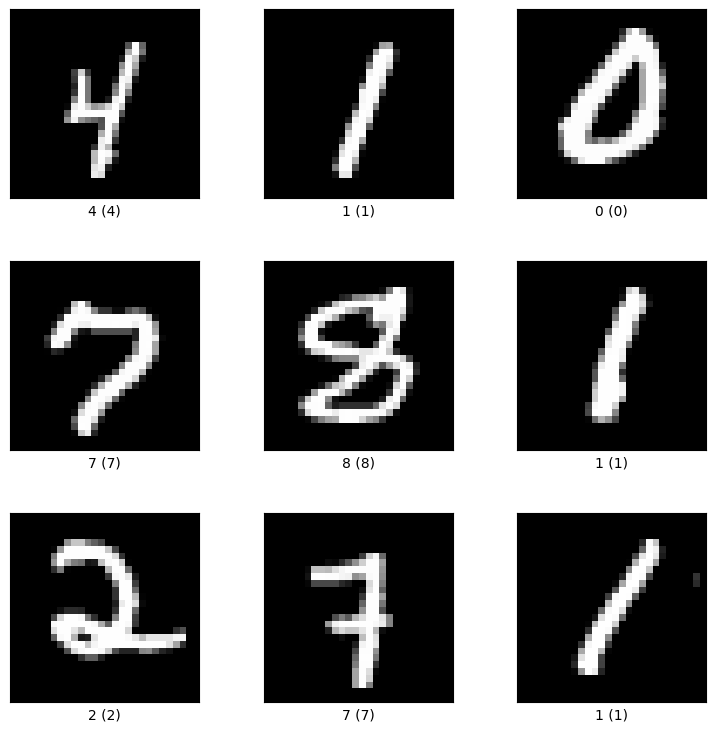

In [3]:
fig = tfds.show_examples(train_ds, ds_info)

# Initial Naive Classification Approaches

The following approaches are naive because each of these models were first built with arbitrarily selected parameters based on previous experience with building models on other datasets. If the initial performance is well, then we pursue hyperparameter training

- Logistic Regression Classifier
- Naive Bayes Classifier
- Decision Trees Classifier
- K-Nearest Neighbors Classifier
- Support Vector Machines Classifier

### Load Dataset for SKLearn & Initial Naive Models

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [2]:
print(len(mnist.data))
mnist.data.head()

70000


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualize Subset of Data

- Plotting all 784 pixels in a 28 x 28 subplot for the first 6 images from the entire dataset.

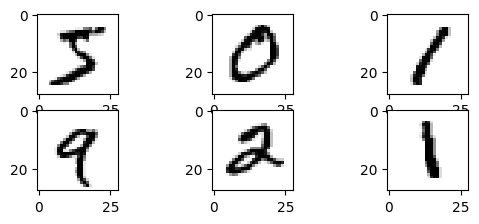

In [3]:
import matplotlib.pyplot as plt

image = mnist.data.to_numpy()
plt.subplot(431)
plt.imshow((image[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(432)
plt.imshow(image[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(433)
plt.imshow(image[3].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(434)
plt.imshow(image[4].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(435)
plt.imshow(image[5].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(436)
plt.imshow(image[6].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

## Split Up Data into Training & Test

We are splitting 

In [26]:
from sklearn.model_selection import train_test_split

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, test_size=10_000, random_state=42)

# Step 3: Preprocess the data (divide every pixel value by 255)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

## Initial Model Development

- Models are built with arbitrary parameters based on prior experience with building models.

### Logistic Regression Classifier

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Step 4: Create a logistic regression model
# Random State is given specifically for reproducability
lr = LogisticRegression(multi_class='multinomial', random_state=42)

# Step 5: Perform hyperparameter tuning using GridSearchCV
lr_pg = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']  # Different solvers
}  # Hyperparameter grid
lr_gs = GridSearchCV(lr, lr_pg, cv=5, verbose=1, n_jobs=-1)
lr_gs.fit(X_train_scaled, y_train)

# Get the best hyperparameters
lr_bp = lr_gs.best_params_

# Step 6: Evaluate the model on the testing set
lr_bm = lr_gs.best_estimator_
lr_acc = lr_gs.score(X_test_scaled, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [41]:
import pandas as pd
lr_gs_res = pd.DataFrame(lr_gs.cv_results_)
lr_gs_res = lr_gs_res.sort_values(by='rank_test_score')

lr_gs_res.head(1)


AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

#### Logistic Regression Best Model

- Showcase best parameters
- Showcase accuracy, precision, recall

In [20]:
from sklearn.metrics import classification_report

print(lr_gs.best_params_)
# Same as cross-entropy loss which is the recommended function to use
# for multi-nomial class label classification problems
print("Accuracy via log_loss", lr_acc)
lr_y_pred = lr_bm.predict(X_test_scaled)

# Generate classification report
lr_class_rep = classification_report(y_test, lr_y_pred)
print(lr_class_rep)

{'C': 0.001}
Accuracy via log_loss 0.8934
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       983
           1       0.88      0.97      0.92      1152
           2       0.90      0.85      0.88       967
           3       0.87      0.86      0.86      1034
           4       0.88      0.90      0.89       906
           5       0.88      0.83      0.85       937
           6       0.91      0.94      0.92       961
           7       0.91      0.92      0.92      1055
           8       0.88      0.82      0.85       969
           9       0.88      0.87      0.88      1036

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### Gaussian Naive Bayes Classifier

There are no hyperparamters / parameters to tune.

Naive Bayes gives pretty low accuracy because it consideres all the probablities as independent of each other (hence-naive).

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, test_size=10_000, random_state=42)

# Step 3: Preprocess the data (divide every pixel value by 255)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Step 4: Create a Naive Bayes model
nb = GaussianNB()

# Step 5: Perform hyperparameter tuning (No hyperparameters to tune for Naive Bayes)
# You can skip this step for Naive Bayes

# Step 6: Fit the model
nb.fit(X_train_scaled, y_train)

# Step 7: Evaluate the model on the testing set
nb_acc = nb.score(X_test_scaled, y_test)

In [28]:
print("Accuracy via log_loss", nb_acc)
nb_y_pred = nb.predict(X_test_scaled)

# Generate classification report
nb_class_rep = classification_report(y_test, nb_y_pred)
print(nb_class_rep)

Accuracy via log_loss 0.5604
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       983
           1       0.82      0.96      0.88      1152
           2       0.85      0.31      0.46       967
           3       0.76      0.35      0.48      1034
           4       0.86      0.14      0.24       906
           5       0.68      0.05      0.10       937
           6       0.64      0.94      0.76       961
           7       0.91      0.29      0.44      1055
           8       0.28      0.60      0.38       969
           9       0.38      0.94      0.55      1036

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



### Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Step 3: Create a Decision Trees model
dt = DecisionTreeClassifier(random_state=42)

# Step 4: Perform hyperparameter tuning using GridSearchCV
dt_pg = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}  # Hyperparameter grid

dt_gs = GridSearchCV(dt, dt_pg, cv=5, verbose=1, n_jobs=-1)
dt_gs.fit(X_train, y_train)

# Get the best hyperparameters
dt_bp = dt_gs.best_params_

# Step 5: Evaluate the model on the testing set
dt_bm = dt_gs.best_estimator_
dt_acc = dt_gs.score(X_test, y_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [34]:
import pandas as pd
dt_gs_res = pd.DataFrame(dt_gs.cv_results_)
dt_gs_res = dt_gs_res.sort_values(by='rank_test_score')

dt_gs_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,16.017536,0.090343,0.062009,0.017228,20,4,10,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.867917,0.866583,0.872417,0.868667,0.869667,0.86905,0.001961,1


#### Decision Tree Best Model

- Showcase best parameters
- Showcase accuracy, precision, recall

In [35]:
print("Decision Tree Best Parameters", dt_bp)
print("Accuracy via log_loss", dt_acc)
dt_y_pred = dt_bm.predict(X_test_scaled)

# Generate classification report
dt_class_rep = classification_report(y_test, dt_y_pred)
print(dt_class_rep)

Decision Tree Best Parameters {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy via log_loss 0.8712
              precision    recall  f1-score   support

           0       0.39      0.30      0.34       983
           1       0.10      0.19      0.13      1152
           2       0.00      0.00      0.00       967
           3       0.07      0.18      0.10      1034
           4       0.00      0.00      0.00       906
           5       0.14      0.41      0.21       937
           6       0.00      0.00      0.00       961
           7       0.30      0.48      0.37      1055
           8       0.00      0.00      0.00       969
           9       0.00      0.00      0.00      1036

    accuracy                           0.16     10000
   macro avg       0.10      0.16      0.11     10000
weighted avg       0.10      0.16      0.12     10000



c:\Users\dines\OneDrive\Documents\GitHub\mnist-digit-classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dines\OneDrive\Documents\GitHub\mnist-digit-classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dines\OneDrive\Documents\GitHub\mnist-digit-classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

### KNN Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Step 4: Create a KNN model
knn = KNeighborsClassifier()

# Step 5: Perform hyperparameter tuning using GridSearchCV
knn_pg = {
    'n_neighbors': range(98, 100, 2),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}  # Hyperparameter grid

knn_gs = GridSearchCV(knn, knn_pg, cv=5, verbose=10, n_jobs=-1)
knn_gs.fit(X_train, y_train)

# Get the best hyperparameters
knn_bp = knn_gs.best_params_

# Step 6: Evaluate the model on the testing set
knn_bm = knn_gs.best_estimator_
knn_acc = knn_gs.score(X_test, y_test)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [36]:
import pandas as pd
knn_gs_res = pd.DataFrame(knn_gs.cv_results_)
knn_gs_res = knn_gs_res.sort_values(by='rank_test_score')

knn_gs_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.767957,0.051087,48.800403,0.474204,auto,98,2,distance,"{'algorithm': 'auto', 'n_neighbors': 98, 'p': ...",0.937417,0.941,0.9385,0.937833,0.9385,0.93865,0.001245,1


#### KNN Best Model

- Showcase best parameters
- Showcase accuracy, precision, recall

In [37]:
print("KNN Best Parameters", knn_bp)
print("Accuracy via log_loss", knn_acc)
knn_y_pred = knn_bm.predict(X_test_scaled)

# Generate classification report
knn_class_rep = classification_report(y_test, knn_y_pred)
print(knn_class_rep)

KNN Best Parameters {'algorithm': 'auto', 'n_neighbors': 98, 'p': 2, 'weights': 'distance'}
Accuracy via log_loss 0.94
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       983
           1       0.12      1.00      0.21      1152
           2       0.00      0.00      0.00       967
           3       0.00      0.00      0.00      1034
           4       0.00      0.00      0.00       906
           5       0.00      0.00      0.00       937
           6       0.00      0.00      0.00       961
           7       0.00      0.00      0.00      1055
           8       0.00      0.00      0.00       969
           9       0.00      0.00      0.00      1036

    accuracy                           0.12     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.12      0.02     10000



c:\Users\dines\OneDrive\Documents\GitHub\mnist-digit-classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dines\OneDrive\Documents\GitHub\mnist-digit-classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dines\OneDrive\Documents\GitHub\mnist-digit-classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

### Support Vector Machine (SVM) Classification Model

In [42]:
from sklearn.svm import SVC

base_svm = SVC(C=1.0, kernel='rbf')
base_svm.fit(X_train, y_train)
acc = base_svm.score(X_test,y_test)
print(acc)

In [38]:
from sklearn.svm import SVC

# Step 4: Create a SVM model
svm = SVC()

# Step 5: Perform hyperparameter tuning using GridSearchCV
svm_pg = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']  # Kernel coefficient
}  # Hyperparameter grid

svm_gs = GridSearchCV(svm, svm_pg, cv=5, verbose=1, n_jobs=-1)
svm_gs.fit(X_train, y_train)

# Get the best hyperparameters
svm_bp = svm_gs.best_params_

# Step 6: Evaluate the model on the testing set
svm_bm = svm_gs.best_estimator_
svm_acc = svm_gs.score(X_test, y_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


KeyboardInterrupt: 

In [ ]:
import pandas as pd
svm_gs_res = pd.DataFrame(svm_gs.cv_results_)
svm_gs_res = svm_gs_res.sort_values(by='rank_test_score')

svm_gs_res.head(1)

#### SVM Best Model

- Showcase best parameters
- Showcase accuracy, precision, recall

In [ ]:
print("SVM Best Parameters", svm_bp)
print("Accuracy via log_loss", svm_acc)
svm_y_pred = svm_bp.predict(X_test_scaled)

# Generate classification report
svm_class_rep = classification_report(y_test, svm_y_pred)
print(svm_class_rep)